# Corona Virus Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline
sbn.set(rc={'figure.figsize':(11.7,8.27)})


In [2]:
rawData = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

In [3]:
dataFrames = dict(states={}, counties={})
columns = ['cases', 'deaths']

def getTotal(): 
    if not "total" in dataFrames:
        dataFrames["total"] =rawData.groupby('date').sum()[columns]
    return dataFrames["total"]

def getState(state):
    if not state in dataFrames["states"]:
        statedf = rawData[rawData.state==state].groupby('date').sum()[columns]
        if statedf.empty:
            print (state + " is not in the data, did you spell it right? capitalization?")
            return 
        else:
            dataFrames["states"][state] = statedf
    return dataFrames["states"][state]

def getCounty(county):
    if not county in dataFrames["counties"]:
        countydf = rawData[rawData.county==county].groupby('date').sum()[columns]
        if countydf.empty:
            print(county + " is not in the data, did you spell it right? capitalization?")
            return
        else:
            dataFrames["counties"][county] = countydf
    return dataFrames["counties"][county]
        

In [4]:
yesterday, today = getTotal().tail(2).index.values # last two dates data to check how recent this data is
print("Latest date: ", today)

Latest date:  2020-04-17


In [5]:

yesterdayLatest = rawData[rawData.date == yesterday].groupby(['state', 'county']).sum()[columns]
latest = rawData[rawData.date == today].groupby(['state', 'county']).sum()[columns]
deltas = latest - yesterdayLatest
latest["newcases"] = deltas.cases
latest["newdeaths"] = deltas.deaths
latest = latest.reset_index()

In [6]:
def worstPlaces(state=None, count=15):
    if state == None:
        count = 30
        print(f"Counties with the most new cases in US for {today}:")
        display(latest.sort_values(['newcases', 'newdeaths'], ascending=False)[:count].reset_index(drop=True))
        print(f"Counties with the most new deaths in US for {today}:")
        display(latest.sort_values(['newdeaths', 'newcases'], ascending=False)[:count].reset_index(drop=True))
    else:
        print(f"Counties with the most new cases in {state} for {today}:")
        display(latest[latest.state==state].sort_values(['newcases', 'newdeaths'], ascending=False)[:count].reset_index(drop=True))
        print(f"Counties with the most new deaths in {state} for {today}:")
        display(latest[latest.state==state].sort_values(['newdeaths', 'newcases'], ascending=False)[:count].reset_index(drop=True))


In [7]:
worstPlaces()

Counties with the most new cases in US for 2020-04-17:


,state,county,cases,deaths,newcases,newdeaths
0,New York,New York City,127352,8632,4206.0,0.0
1,Illinois,Cook,19391,760,1304.0,38.0
2,New York,Suffolk,25035,706,853.0,0.0
3,New York,Nassau,28539,1356,767.0,0.0
4,New York,Westchester,22476,738,648.0,0.0
5,New Jersey,Essex,9672,684,588.0,42.0
6,Massachusetts,Middlesex,7744,294,538.0,36.0
7,California,Los Angeles,11391,495,537.0,40.0
8,New Jersey,Union,8429,330,525.0,29.0
9,Pennsylvania,Philadelphia,8563,298,518.0,34.0


Counties with the most new deaths in US for 2020-04-17:


,state,county,cases,deaths,newcases,newdeaths
0,Michigan,Wayne,13233,1044,231.0,63.0
1,New Jersey,Hudson,9636,420,471.0,55.0
2,New Jersey,Bergen,11863,714,454.0,46.0
3,New Jersey,Essex,9672,684,588.0,42.0
4,California,Los Angeles,11391,495,537.0,40.0
5,Illinois,Cook,19391,760,1304.0,38.0
6,Massachusetts,Middlesex,7744,294,538.0,36.0
7,Pennsylvania,Philadelphia,8563,298,518.0,34.0
8,New Jersey,Middlesex,7308,309,314.0,31.0
9,New Jersey,Union,8429,330,525.0,29.0


In [8]:
worstPlaces("California")

Counties with the most new cases in California for 2020-04-17:


,state,county,cases,deaths,newcases,newdeaths
0,California,Los Angeles,11391,495,537.0,40.0
1,California,Riverside,2457,69,193.0,10.0
2,California,Orange,1501,28,76.0,3.0
3,California,San Diego,2158,70,71.0,7.0
4,California,San Bernardino,1096,55,64.0,8.0
5,California,San Francisco,1061,20,39.0,3.0
6,California,Santa Clara,1870,74,37.0,4.0
7,California,San Mateo,797,28,30.0,0.0
8,California,San Joaquin,398,17,29.0,0.0
9,California,Santa Barbara,373,3,19.0,0.0


Counties with the most new deaths in California for 2020-04-17:


,state,county,cases,deaths,newcases,newdeaths
0,California,Los Angeles,11391,495,537.0,40.0
1,California,Riverside,2457,69,193.0,10.0
2,California,San Bernardino,1096,55,64.0,8.0
3,California,San Diego,2158,70,71.0,7.0
4,California,Santa Clara,1870,74,37.0,4.0
5,California,Orange,1501,28,76.0,3.0
6,California,San Francisco,1061,20,39.0,3.0
7,California,Contra Costa,648,19,17.0,3.0
8,California,Yolo,126,8,1.0,1.0
9,California,San Mateo,797,28,30.0,0.0


In [9]:
worstPlaces("Colorado")

Counties with the most new cases in Colorado for 2020-04-17:


,state,county,cases,deaths,newcases,newdeaths
0,Colorado,Denver,1636,66,87.0,3.0
1,Colorado,Arapahoe,1419,58,77.0,3.0
2,Colorado,Adams,860,31,55.0,2.0
3,Colorado,Jefferson,888,35,28.0,2.0
4,Colorado,Weld,986,61,26.0,1.0
5,Colorado,Douglas,353,15,24.0,0.0
6,Colorado,El Paso,708,49,19.0,1.0
7,Colorado,Boulder,327,15,15.0,0.0
8,Colorado,Morgan,135,2,13.0,2.0
9,Colorado,Larimer,224,10,7.0,1.0


Counties with the most new deaths in Colorado for 2020-04-17:


,state,county,cases,deaths,newcases,newdeaths
0,Colorado,Denver,1636,66,87.0,3.0
1,Colorado,Arapahoe,1419,58,77.0,3.0
2,Colorado,Adams,860,31,55.0,2.0
3,Colorado,Jefferson,888,35,28.0,2.0
4,Colorado,Morgan,135,2,13.0,2.0
5,Colorado,Weld,986,61,26.0,1.0
6,Colorado,El Paso,708,49,19.0,1.0
7,Colorado,Larimer,224,10,7.0,1.0
8,Colorado,Pueblo,78,6,6.0,1.0
9,Colorado,Logan,17,1,0.0,1.0


In [10]:
worstPlaces("Arizona")

Counties with the most new cases in Arizona for 2020-04-17:


,state,county,cases,deaths,newcases,newdeaths
0,Arizona,Maricopa,2404,69,140.0,5.0
1,Arizona,Pima,819,51,59.0,14.0
2,Arizona,Navajo,435,11,25.0,0.0
3,Arizona,Apache,141,4,23.0,0.0
4,Arizona,Pinal,212,5,15.0,0.0
5,Arizona,Coconino,304,29,5.0,3.0
6,Arizona,Cochise,20,0,2.0,0.0
7,Arizona,Yuma,23,1,2.0,0.0
8,Arizona,Santa Cruz,15,0,1.0,0.0
9,Arizona,Yavapai,69,1,1.0,0.0


Counties with the most new deaths in Arizona for 2020-04-17:


,state,county,cases,deaths,newcases,newdeaths
0,Arizona,Pima,819,51,59.0,14.0
1,Arizona,Maricopa,2404,69,140.0,5.0
2,Arizona,Coconino,304,29,5.0,3.0
3,Arizona,Navajo,435,11,25.0,0.0
4,Arizona,Apache,141,4,23.0,0.0
5,Arizona,Pinal,212,5,15.0,0.0
6,Arizona,Cochise,20,0,2.0,0.0
7,Arizona,Yuma,23,1,2.0,0.0
8,Arizona,Santa Cruz,15,0,1.0,0.0
9,Arizona,Yavapai,69,1,1.0,0.0


In [11]:
def fitExponential(series):
    series = series.dropna()
    series = series[series>0]
    logseries = np.log(series)
    n = len(logseries)
    rate, intercept = np.polyfit(np.arange(n), logseries, 1) 
    base = np.exp(intercept)
    return (rate, base, n) 


In [12]:
def plotFitted(series, name, log=True): 
    (rate, base, n) = fitExponential(series)
    x = np.arange(n)
    series = series[-n:]
    if log:
        plt.semilogy()
    sbn.set(rc={'figure.figsize':(11.7,8.27)})
    sbn.scatterplot(x, series, label=f"{name} actual")
    sbn.lineplot(x, base * np.exp(rate*x) , label=f"{name} expected with constant exponential growth")
    plt.show()

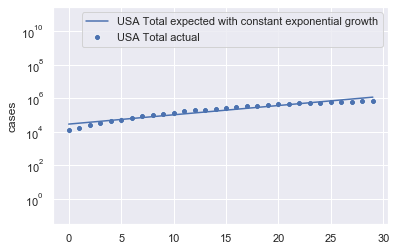

In [13]:
plotFitted(getTotal()["cases"][-30:], "USA Total")

In [14]:
def growthRateAnalysis(series, name, n=30):
    rate, base, n = fitExponential(series[-n:])
    name = f"{name} {series.name}"
    formula = f"{series.name} = {np.round(base, 2)} * exp({np.round(rate, 4)} * day)"
    dailyGrowth = np.round(100 * (np.exp(rate) - 1), 2)
    daysToDoubling = np.round(np.log(2)/rate, 2)
    print(f"{name} exponential formula fitted with {n} points:")
    print(formula)
    print(f"fitted daily growth rate: {dailyGrowth} %, fitted days to doubling: {daysToDoubling}")
    deltas = series.diff(1)
    rates = 100*deltas/series
    data = {
        f"{name} day to day growth rate (%)":rates, 
        f"{name} 3 day moving average":rates.rolling(window=3).mean(), 
        f"{name} 5 day moving average":rates.rolling(window=5).mean(), 
    }
    df = pd.DataFrame(data).dropna()[-n:]
    gr = df.tail(1)[f"{name} 5 day moving average"].values[0]
    dailyGrowth = np.round(gr, 2)
    daysToDoubling = np.round(np.log(2)*100/gr, 2)
    print(f"actual daily growth rate: {dailyGrowth} %, actual days to doubling: {daysToDoubling}")    
    sbn.lineplot(data=df)
    plt.show()
    plotFitted(series[-n:], name)


Total USA cases exponential formula fitted with 30 points:
cases = 28876.02 * exp(0.1279 * day)
fitted daily growth rate: 13.64 %, fitted days to doubling: 5.42
actual daily growth rate: 4.52 %, actual days to doubling: 15.33


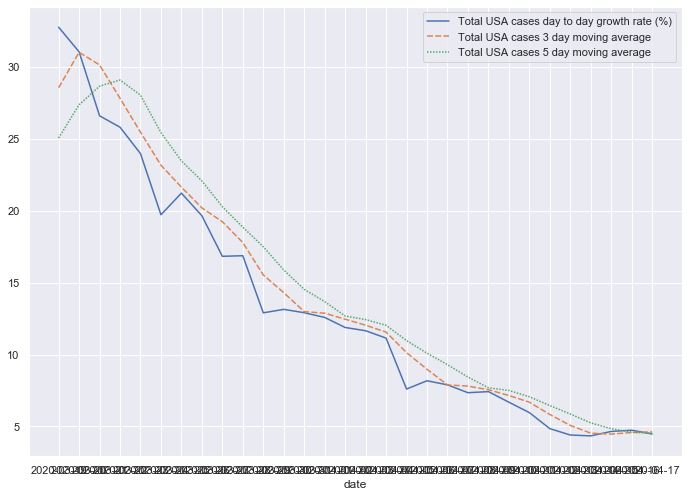

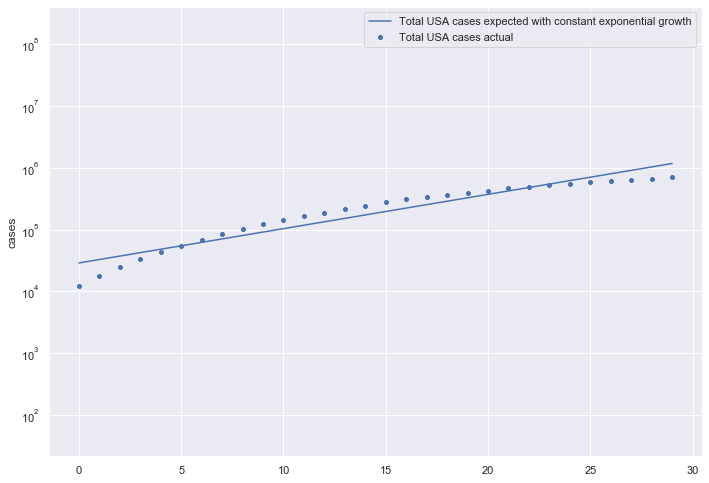

In [15]:
growthRateAnalysis(getTotal()['cases'], "Total USA")

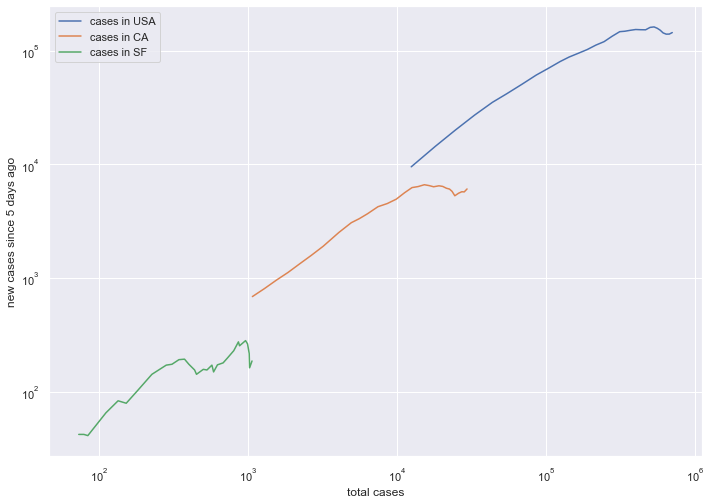

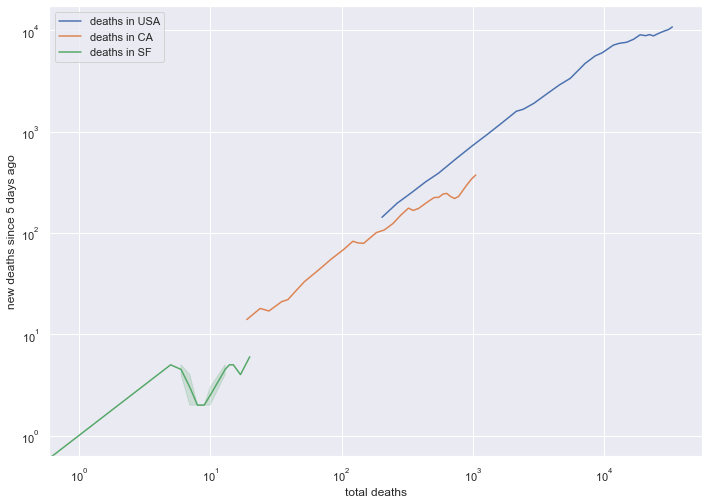

In [16]:
def trajectoryPlot(series, name):
    deltas = series.diff(5)
    fullname = f"{series.name} in {name}"
    x = f"total {series.name}"
    y = f"new {series.name} since 5 days ago"
    data = {x: series, y: deltas}
    plt.loglog()
    df = pd.DataFrame(data).dropna()[-30:]
    sbn.lineplot(x, y, data=df, label=fullname)
    
trajectoryPlot(getTotal()['cases'], "USA")
trajectoryPlot(getState("California")['cases'], "CA")
trajectoryPlot(getCounty("San Francisco")["cases"], "SF")
plt.show()
trajectoryPlot(getTotal()['deaths'], "USA")
trajectoryPlot(getState("California")['deaths'], "CA")
trajectoryPlot(getCounty("San Francisco")["deaths"], "SF")
plt.show()

In [17]:
def laggedPlot(df, name):
    vals = df.copy()
    vals = df.dropna()[df.cases > 0]
    # show correlation with wide range of time lags
    for i in range(30):
        vals[i] = df.cases.shift(i)
    vals = vals.drop(columns='cases')
    vals = vals[vals.deaths > 0][-20:]
    corrs = vals.corr()[['deaths']].drop('deaths')
    lc = np.log(vals).corr()[['deaths']].drop('deaths')
    lc[0] = lc.deaths
    for i in [3, 5, 7]:
        lc[i] = lc.deaths.rolling(i).mean()
    lc = lc.dropna()
    corrdata = {
        f"{name} correlation of log of deaths to log of cases by # of days ago": lc[0],
        f"{name} correlation 3 day moving average": lc[3],
        f"{name} correlation 5 day moving average": lc[5],
        f"{name} correlation 7 day moving average": lc[7],
    }
    corrsdf = pd.DataFrame(corrdata)
    print(f"Correlations for {name}:")
    sbn.lineplot(data=corrsdf)
    plt.show()
    # dig deeper into an interesting set of time lags
    values = vals[["deaths"]].copy()
    ratios = vals[["deaths"]].copy()
    interesting = [7, 14]
    for i in [0, 3, 5, 7]:
        l = lc[i].dropna()
        lmax = l[l==max(l)] # max at this correlation moving average
        interesting += list(lmax.index)
    for i in sorted(list(set(interesting))):
        values[f"{name} cases {i} days ago"] = vals[i]
        ratios[f"{name} deaths/cases {i} days ago"] = vals.deaths/vals[i]
    ratios = ratios.drop(columns=['deaths'])
    print(f"Deaths vs Lagged Values For {name}:")
    plt.semilogy()
    sbn.lineplot(data=values, dashes=False)
    plt.show()
    print(f"Deaths / Lagged Values For {name}:")
    plt.semilogy()
    sbn.lineplot(data=ratios, dashes=False)
    plt.show()

    

In [18]:
# laggedPlot(getTotal(), "USA")
# laggedPlot(getState("California"), "CA")
# laggedPlot(getCounty("San Francisco"), "SF")

In [19]:
def analyse(counties=[], states=[], n=20):
    sbn.set(rc={'figure.figsize':(11.7,8.27)})
    names = counties + states + ["USA total:"]
    rates= []
    dfs = [getCounty(c) for c in counties] + [getState(s) for s in states] + [getTotal()] 
    print("Trajectory Plots to see if the curve is flattening:")
    for col in ["cases", "deaths"]:
        for df, name in zip(dfs, names):
            trajectoryPlot(df[col], name)
        plt.show()
    for df, name in zip(dfs, names):
        print(f"\n### Analysis for {name:} ###\n")
        growthRateAnalysis(df["cases"], name)
        growthRateAnalysis(df["deaths"], name)
        print(f"Trajectory plots for {name}, to see when the curve starts flattening")
        trajectoryPlot(df.cases, name)
        trajectoryPlot(df.deaths, name)
        plt.show()
#         laggedPlot(df, name)


        
    
    

Trajectory Plots to see if the curve is flattening:


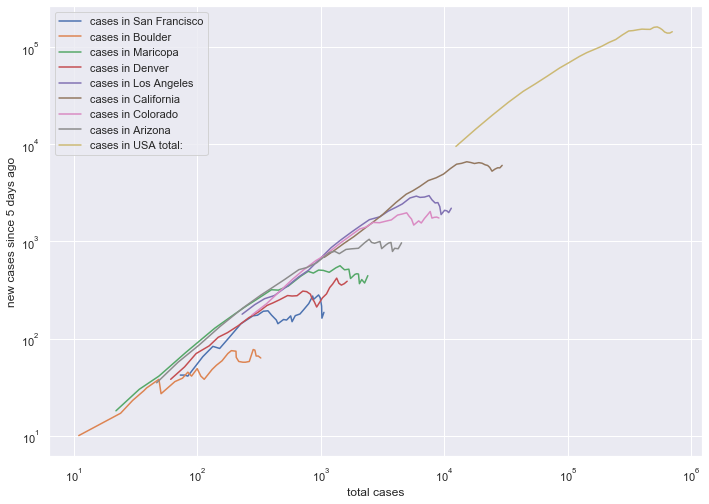

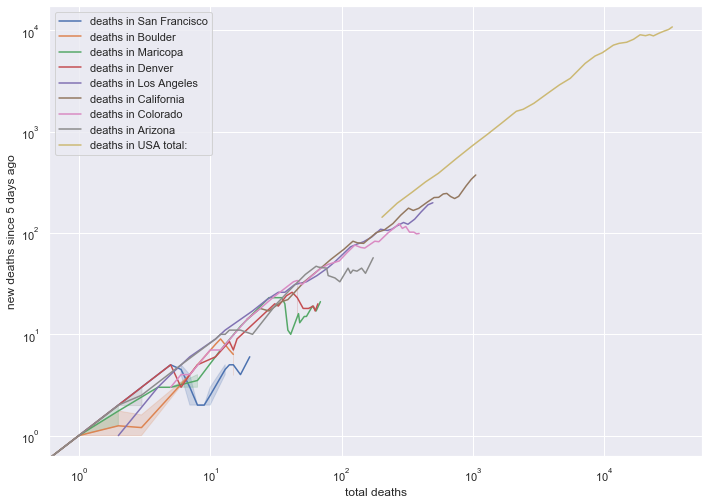


### Analysis for San Francisco ###

San Francisco cases exponential formula fitted with 30 points:
cases = 104.2 * exp(0.0915 * day)
fitted daily growth rate: 9.58 %, fitted days to doubling: 7.57
actual daily growth rate: 3.74 %, actual days to doubling: 18.53


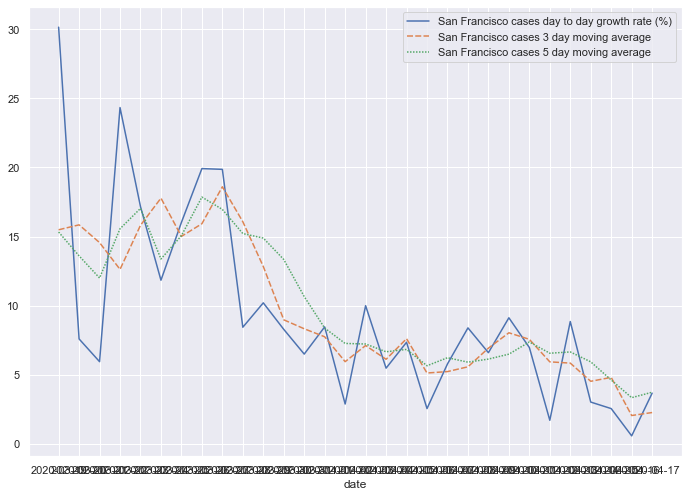

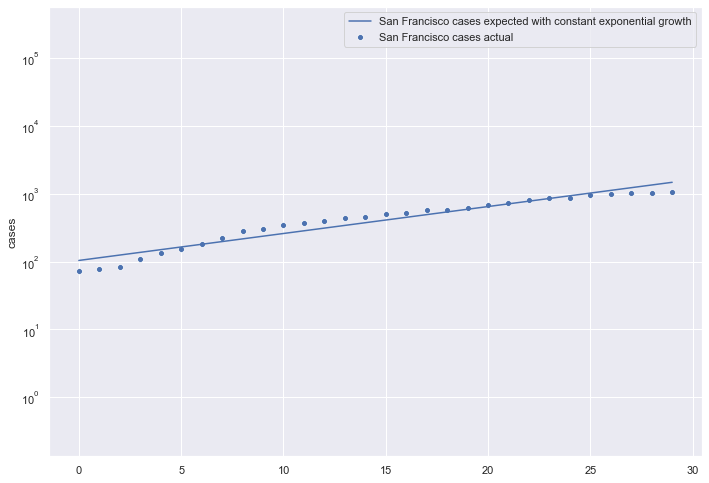

San Francisco deaths exponential formula fitted with 24 points:
deaths = 2.64 * exp(0.0937 * day)
fitted daily growth rate: 9.83 %, fitted days to doubling: 7.39
actual daily growth rate: 6.69 %, actual days to doubling: 10.37


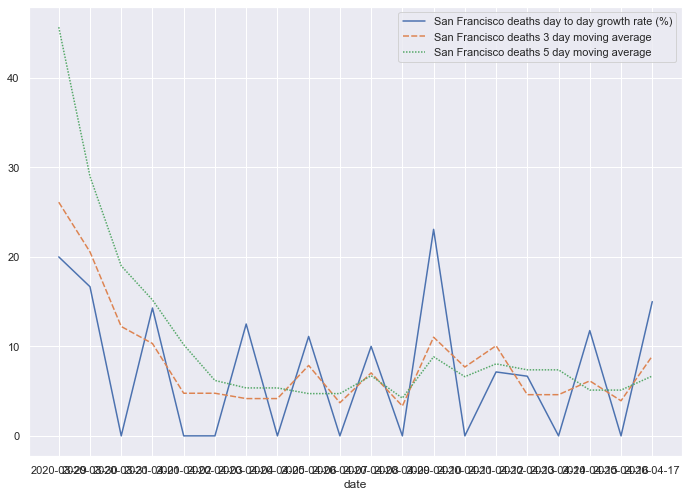

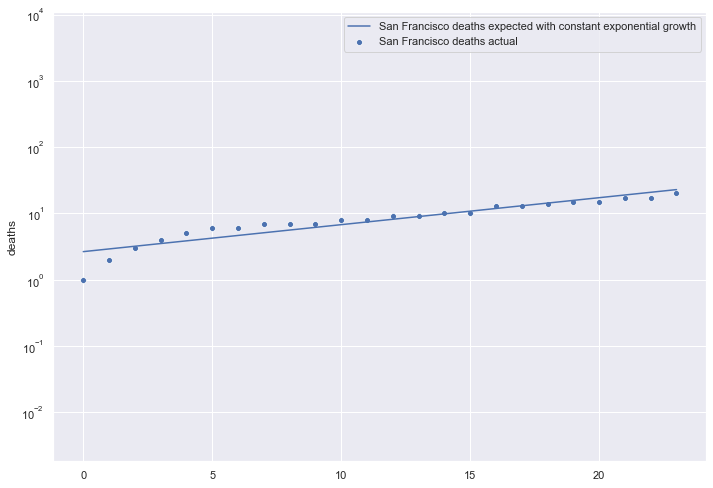

Trajectory plots for San Francisco, to see when the curve starts flattening


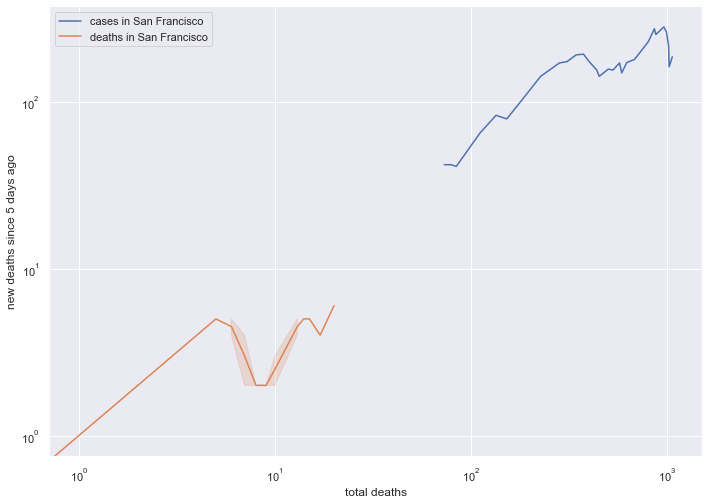


### Analysis for Boulder ###

Boulder cases exponential formula fitted with 30 points:
cases = 28.29 * exp(0.0959 * day)
fitted daily growth rate: 10.07 %, fitted days to doubling: 7.22
actual daily growth rate: 4.18 %, actual days to doubling: 16.6


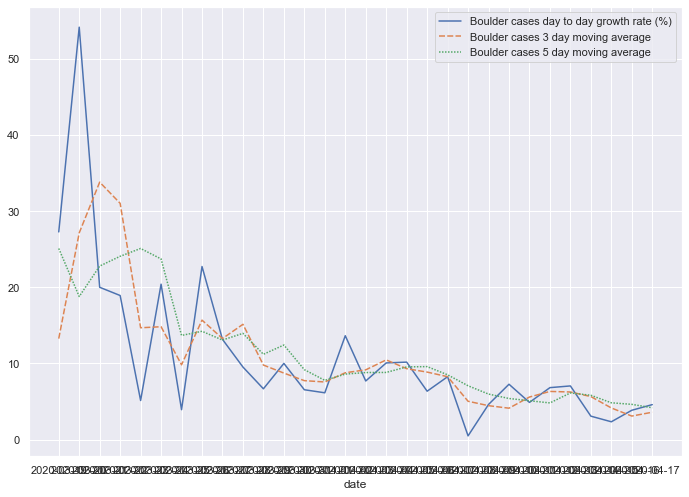

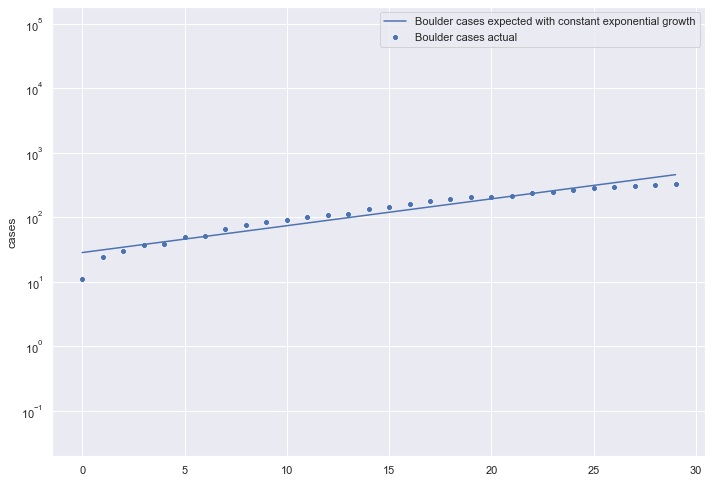

Boulder deaths exponential formula fitted with 22 points:
deaths = 0.83 * exp(0.1476 * day)
fitted daily growth rate: 15.91 %, fitted days to doubling: 4.69
actual daily growth rate: 5.86 %, actual days to doubling: 11.83


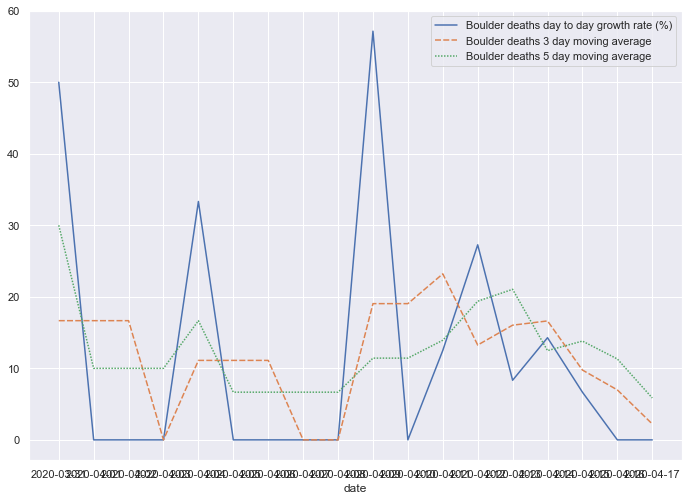

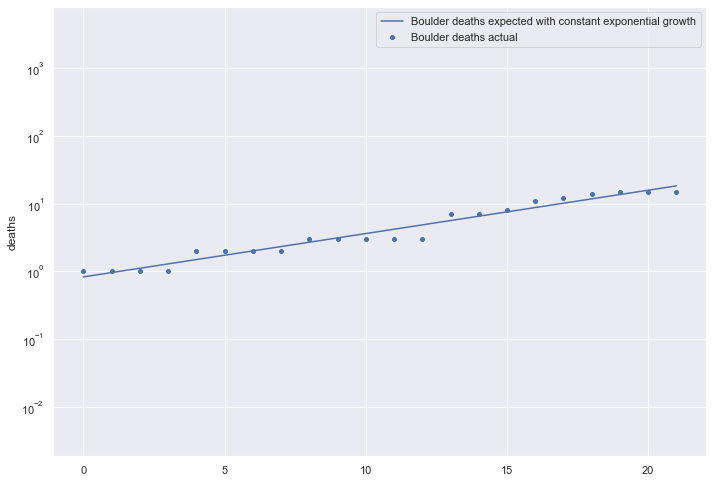

Trajectory plots for Boulder, to see when the curve starts flattening


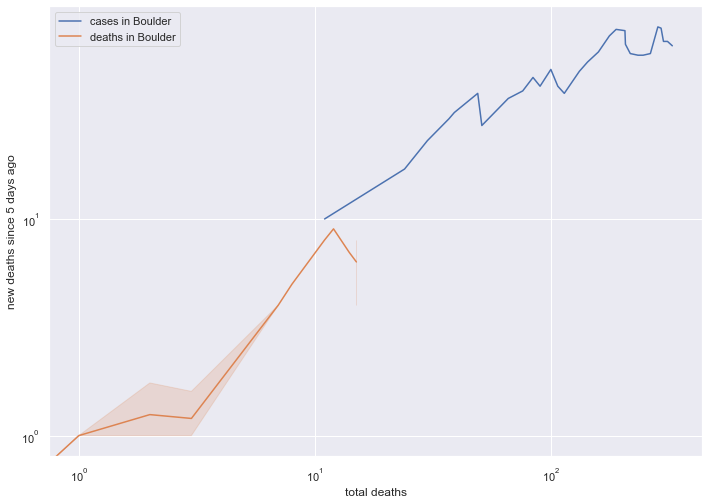


### Analysis for Maricopa ###

Maricopa cases exponential formula fitted with 30 points:
cases = 82.38 * exp(0.1399 * day)
fitted daily growth rate: 15.02 %, fitted days to doubling: 4.95
actual daily growth rate: 3.99 %, actual days to doubling: 17.37


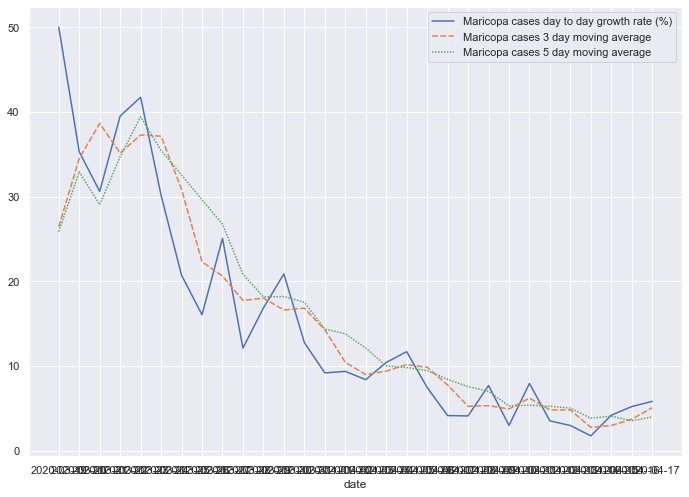

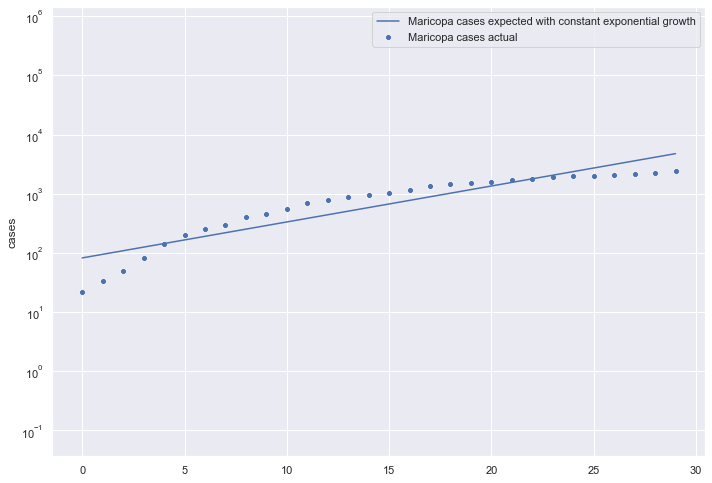

Maricopa deaths exponential formula fitted with 29 points:
deaths = 1.33 * exp(0.1595 * day)
fitted daily growth rate: 17.29 %, fitted days to doubling: 4.35
actual daily growth rate: 6.98 %, actual days to doubling: 9.93


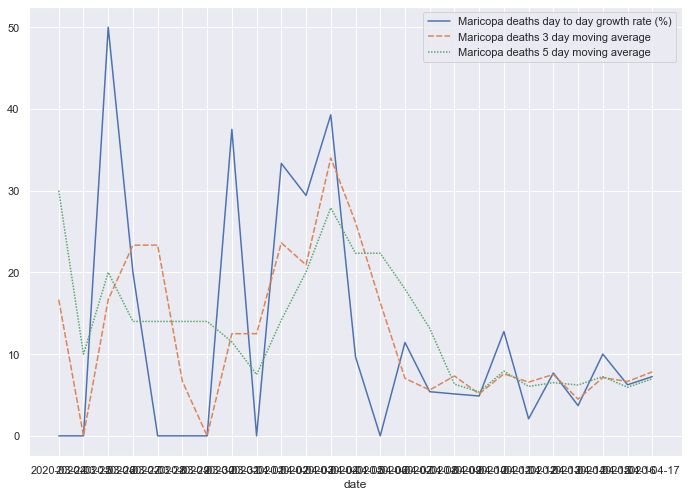

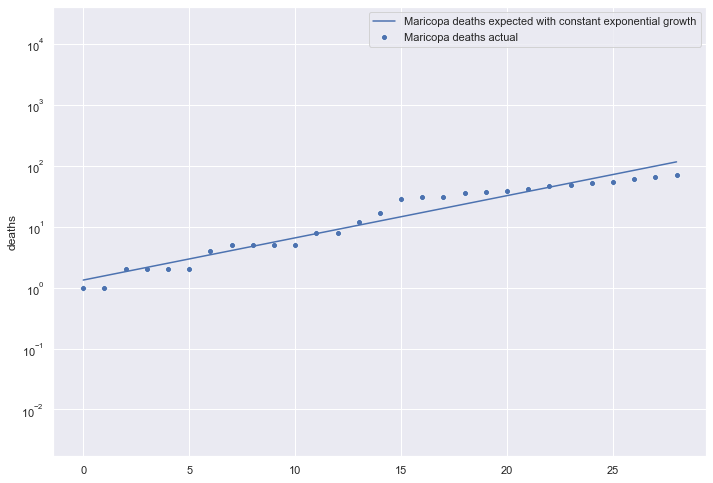

Trajectory plots for Maricopa, to see when the curve starts flattening


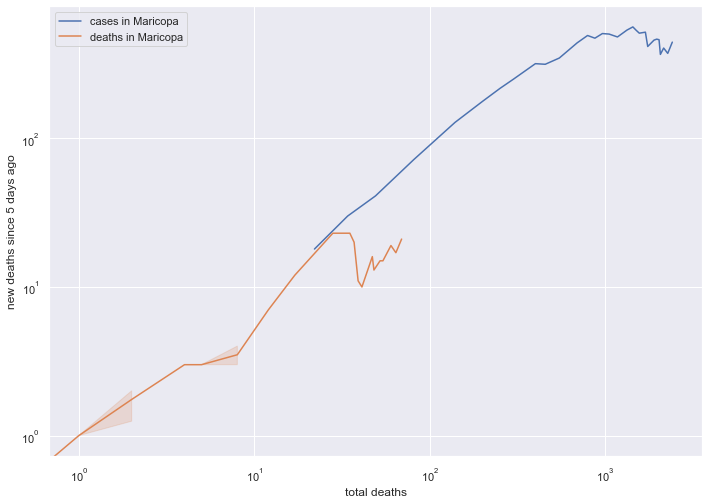


### Analysis for Denver ###

Denver cases exponential formula fitted with 30 points:
cases = 110.18 * exp(0.1053 * day)
fitted daily growth rate: 11.1 %, fitted days to doubling: 6.58
actual daily growth rate: 5.28 %, actual days to doubling: 13.13


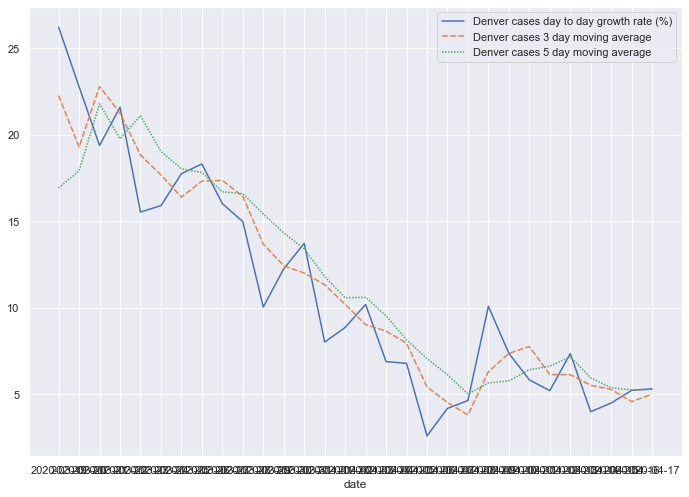

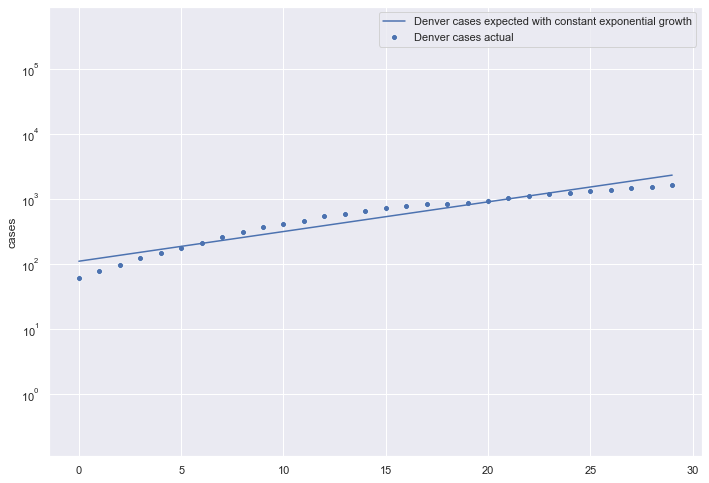

Denver deaths exponential formula fitted with 24 points:
deaths = 3.0 * exp(0.1502 * day)
fitted daily growth rate: 16.21 %, fitted days to doubling: 4.61
actual daily growth rate: 6.93 %, actual days to doubling: 10.0


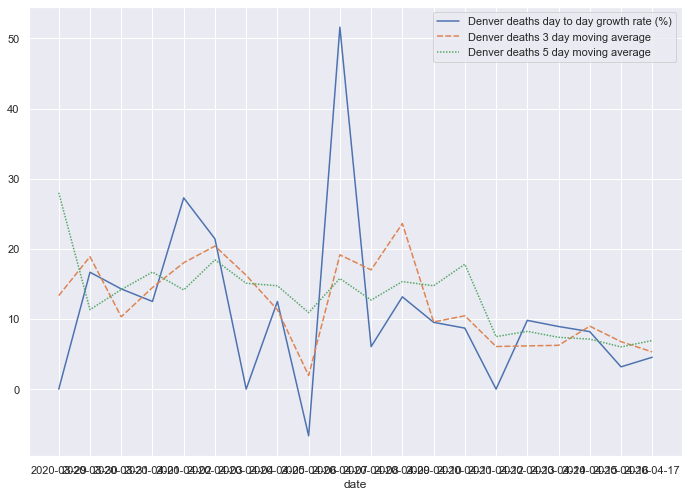

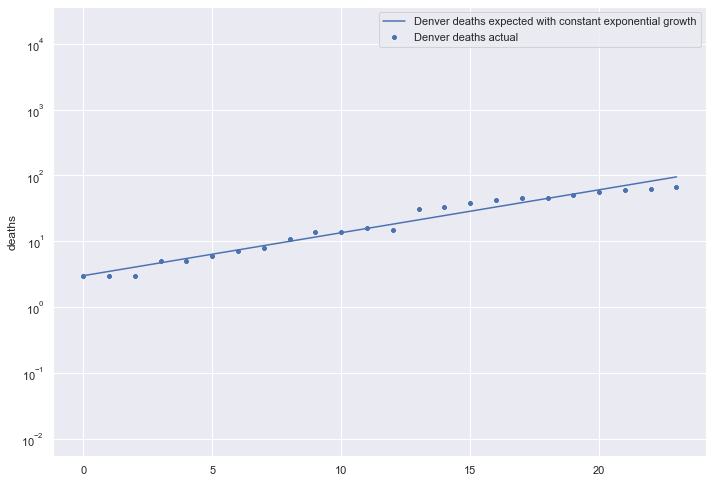

Trajectory plots for Denver, to see when the curve starts flattening


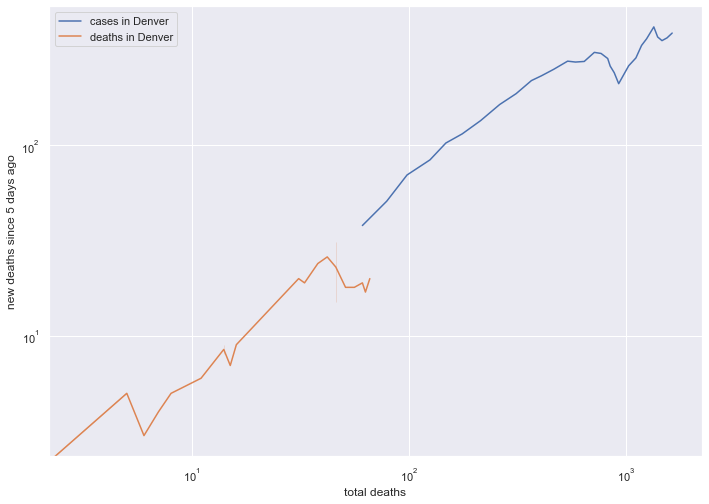


### Analysis for Los Angeles ###

Los Angeles cases exponential formula fitted with 30 points:
cases = 405.74 * exp(0.1353 * day)
fitted daily growth rate: 14.49 %, fitted days to doubling: 5.12
actual daily growth rate: 4.19 %, actual days to doubling: 16.54


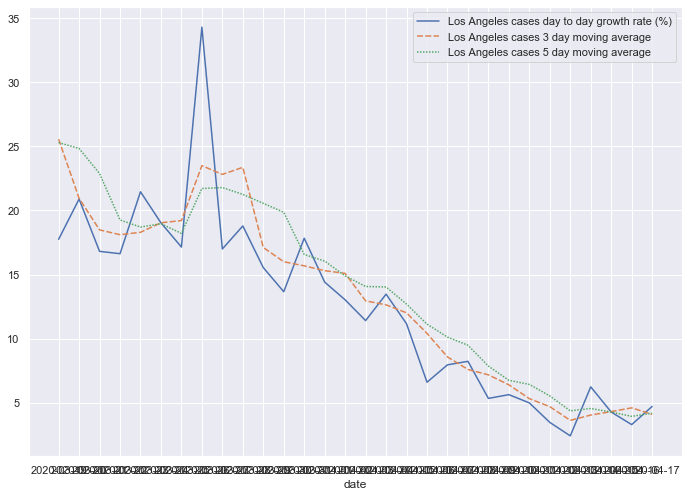

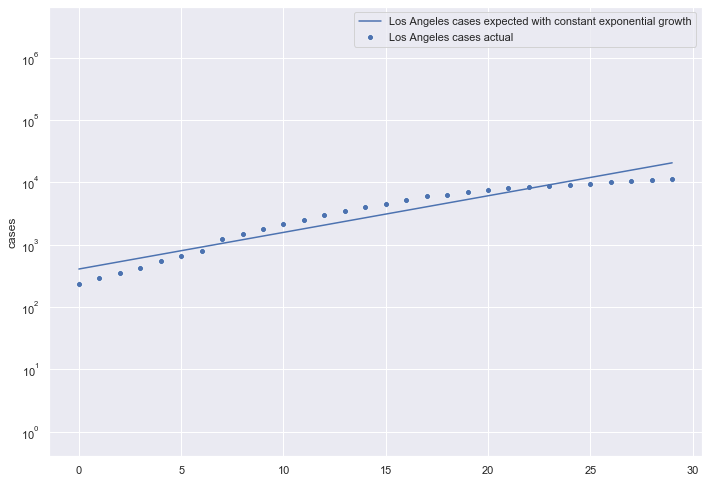

Los Angeles deaths exponential formula fitted with 30 points:
deaths = 4.16 * exp(0.1838 * day)
fitted daily growth rate: 20.18 %, fitted days to doubling: 3.77
actual daily growth rate: 9.76 %, actual days to doubling: 7.1


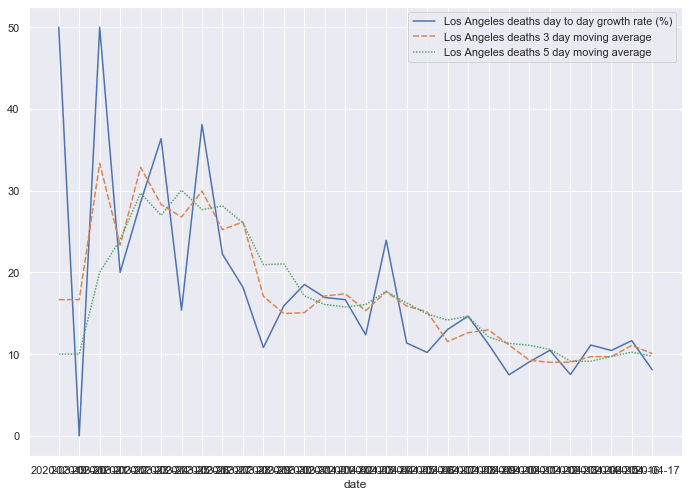

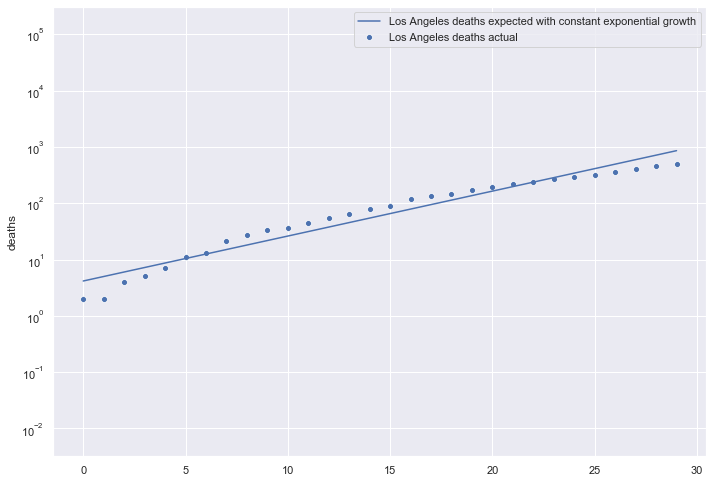

Trajectory plots for Los Angeles, to see when the curve starts flattening


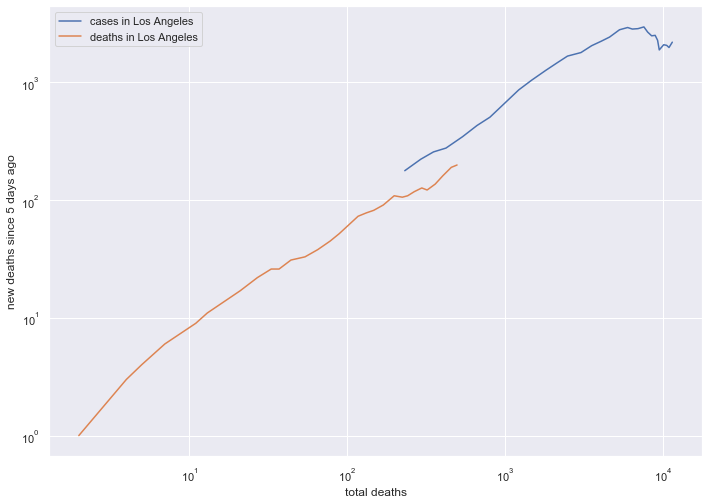


### Analysis for California ###

California cases exponential formula fitted with 30 points:
cases = 1673.35 * exp(0.1139 * day)
fitted daily growth rate: 12.06 %, fitted days to doubling: 6.09
actual daily growth rate: 4.52 %, actual days to doubling: 15.33


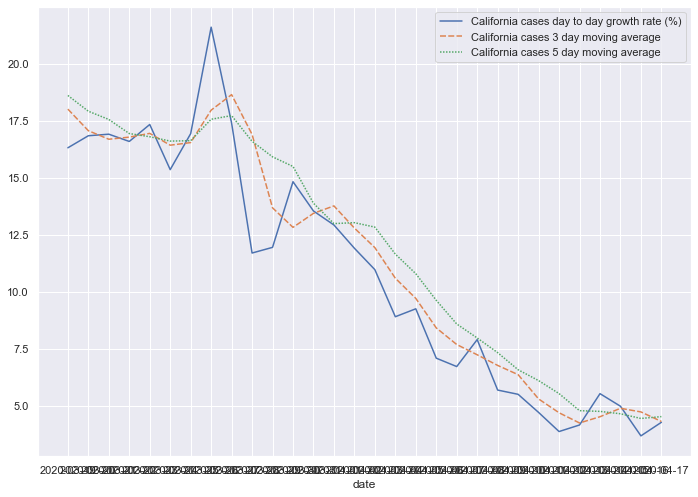

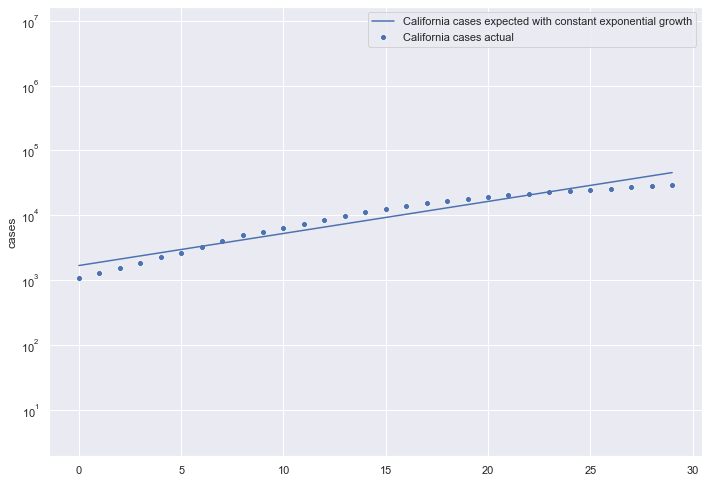

California deaths exponential formula fitted with 30 points:
deaths = 28.6 * exp(0.1359 * day)
fitted daily growth rate: 14.56 %, fitted days to doubling: 5.1
actual daily growth rate: 8.41 %, actual days to doubling: 8.24


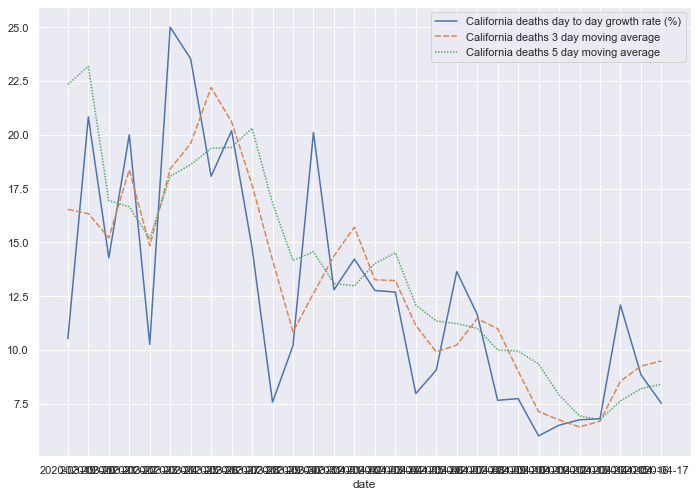

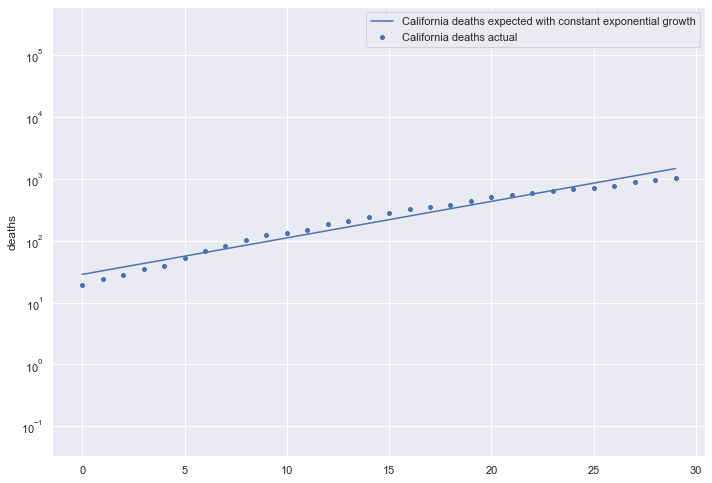

Trajectory plots for California, to see when the curve starts flattening


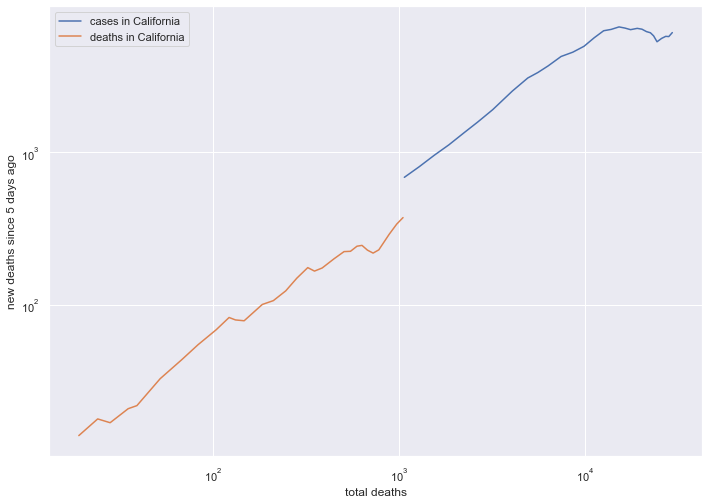


### Analysis for Colorado ###

Colorado cases exponential formula fitted with 30 points:
cases = 551.6 * exp(0.1123 * day)
fitted daily growth rate: 11.88 %, fitted days to doubling: 6.17
actual daily growth rate: 4.19 %, actual days to doubling: 16.54


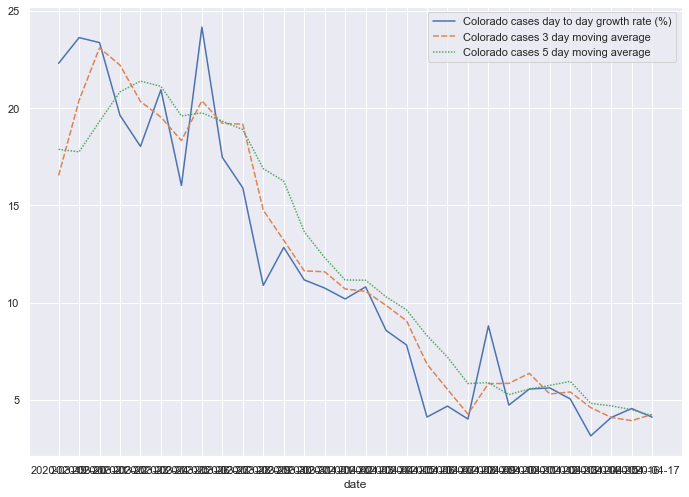

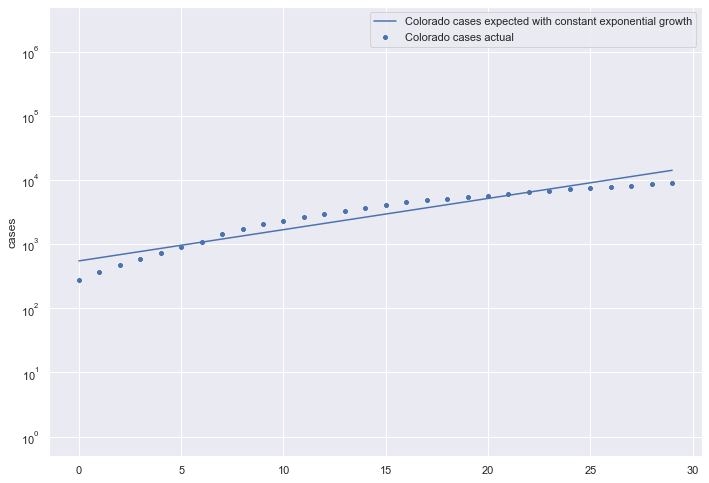

Colorado deaths exponential formula fitted with 30 points:
deaths = 6.97 * exp(0.1589 * day)
fitted daily growth rate: 17.22 %, fitted days to doubling: 4.36
actual daily growth rate: 5.7 %, actual days to doubling: 12.16


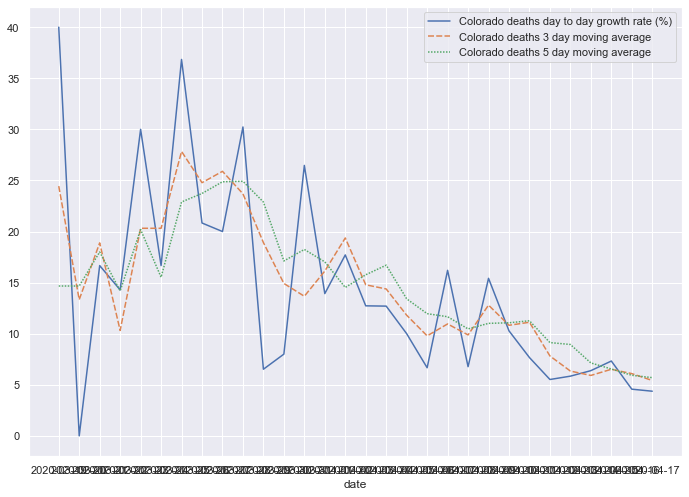

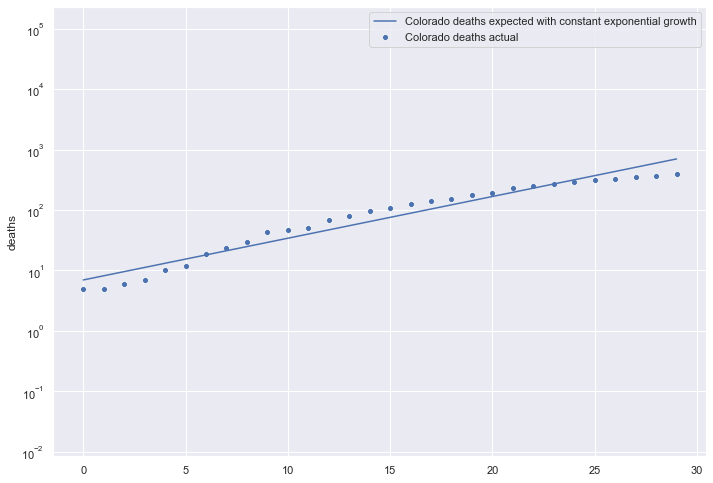

Trajectory plots for Colorado, to see when the curve starts flattening


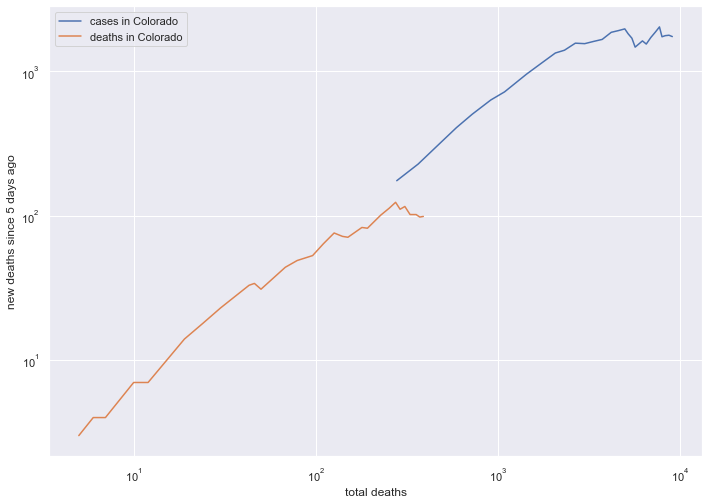


### Analysis for Arizona ###

Arizona cases exponential formula fitted with 30 points:
cases = 146.96 * exp(0.1394 * day)
fitted daily growth rate: 14.96 %, fitted days to doubling: 4.97
actual daily growth rate: 4.71 %, actual days to doubling: 14.71


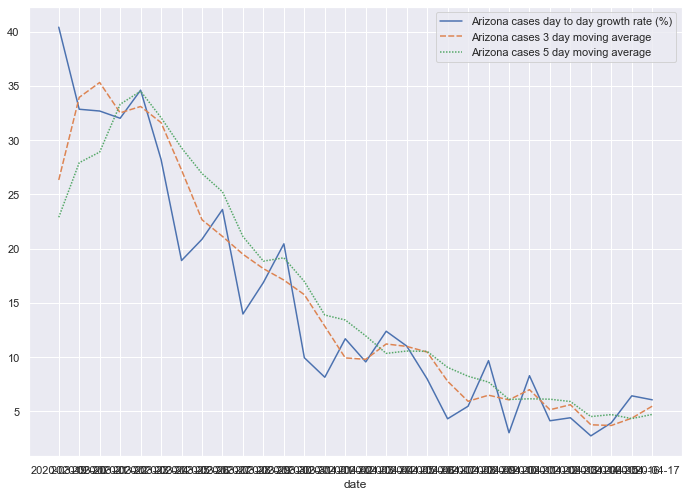

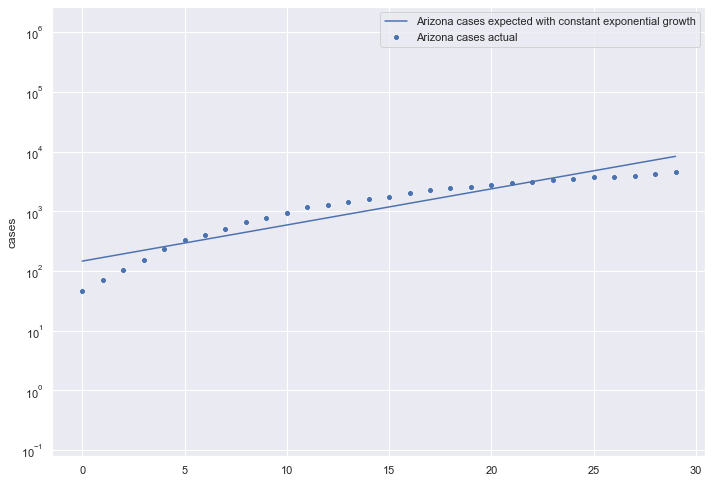

Arizona deaths exponential formula fitted with 29 points:
deaths = 1.82 * exp(0.1862 * day)
fitted daily growth rate: 20.47 %, fitted days to doubling: 3.72
actual daily growth rate: 7.59 %, actual days to doubling: 9.14


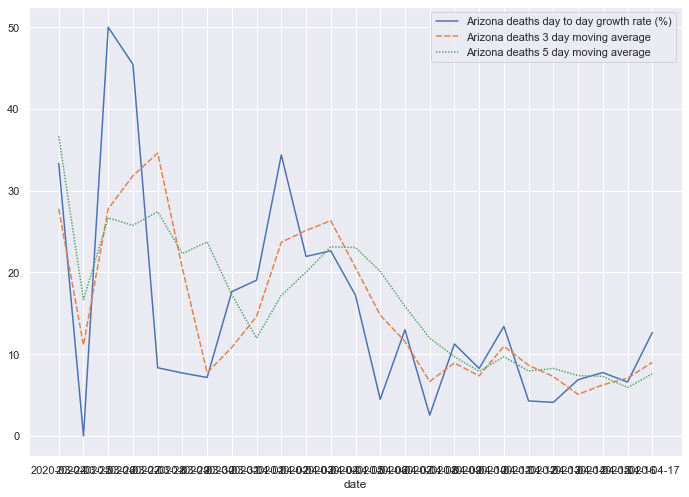

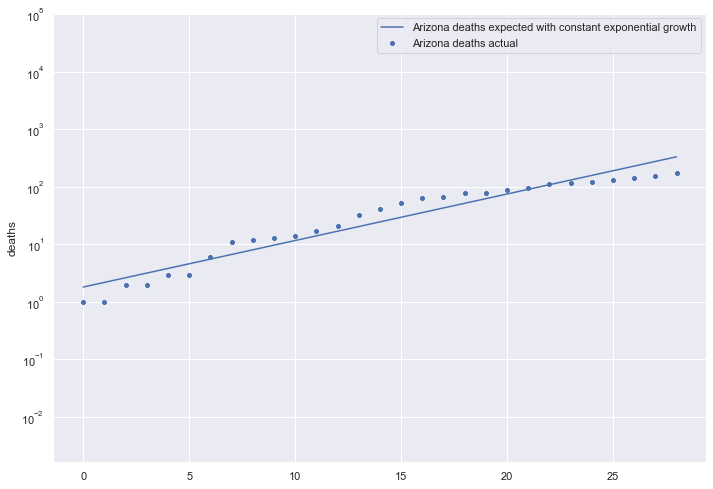

Trajectory plots for Arizona, to see when the curve starts flattening


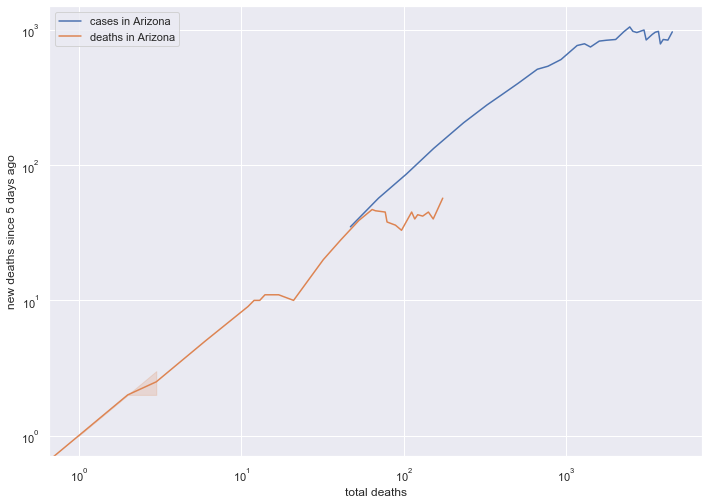


### Analysis for USA total: ###

USA total: cases exponential formula fitted with 30 points:
cases = 28876.02 * exp(0.1279 * day)
fitted daily growth rate: 13.64 %, fitted days to doubling: 5.42
actual daily growth rate: 4.52 %, actual days to doubling: 15.33


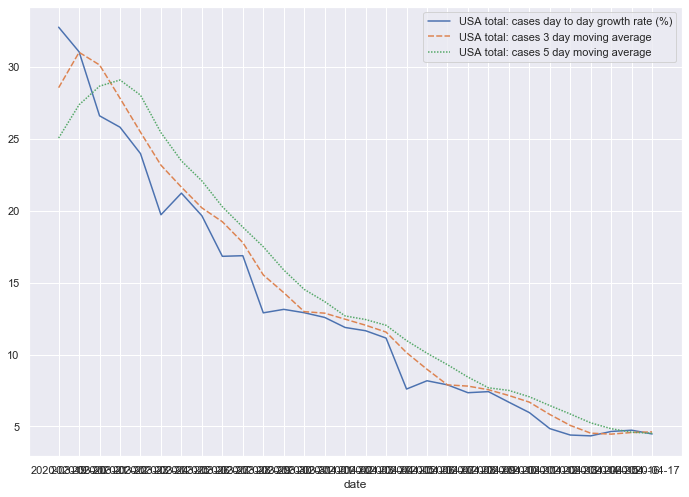

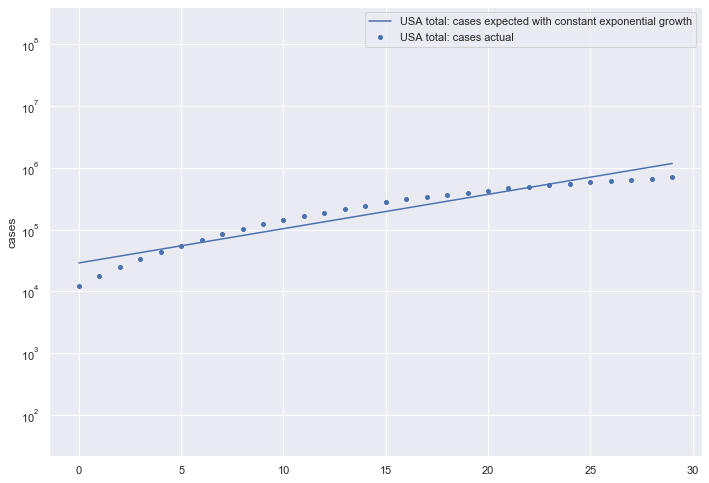

USA total: deaths exponential formula fitted with 30 points:
deaths = 339.3 * exp(0.1777 * day)
fitted daily growth rate: 19.45 %, fitted days to doubling: 3.9
actual daily growth rate: 7.67 %, actual days to doubling: 9.04


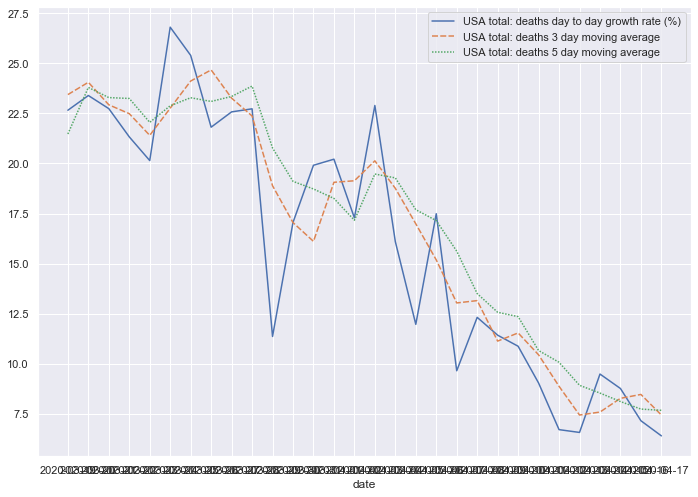

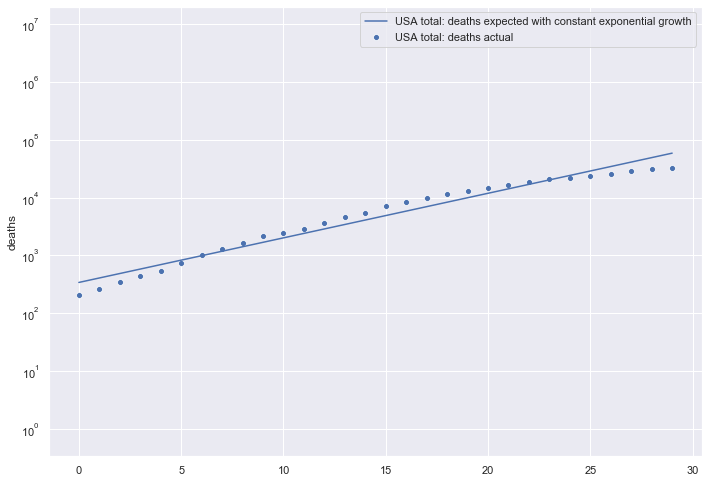

Trajectory plots for USA total:, to see when the curve starts flattening


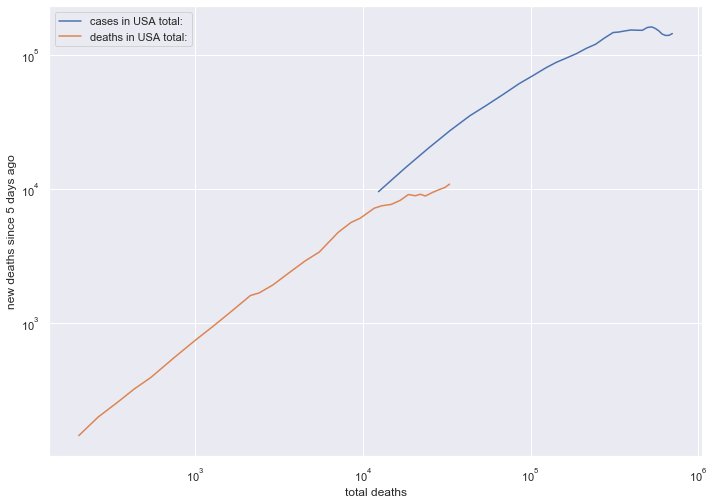

In [20]:
counties =["San Francisco", "Boulder", "Maricopa", "Denver", "Los Angeles"]
states = [ "California", "Colorado", "Arizona"]
analyse(counties=counties, states=states)